In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

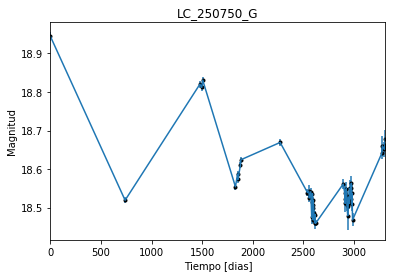

In [2]:
data = np.genfromtxt('LC_250750_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_250750_G')
plt.savefig("LC_250750_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

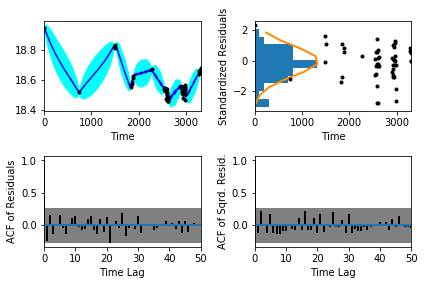

In [5]:
sample.assess_fit()

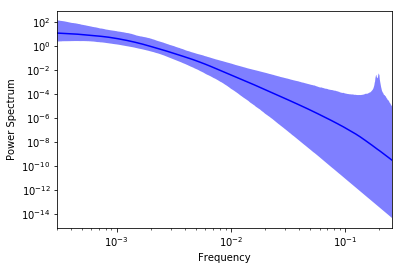

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

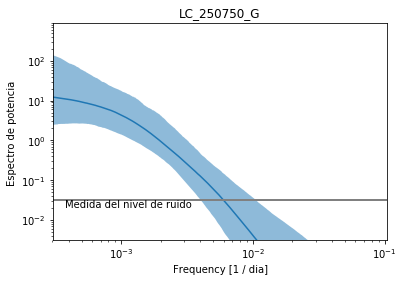

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_250750_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_250750_G')

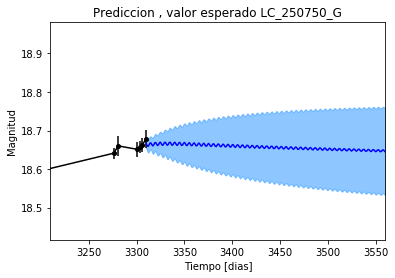

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_250750_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_250750_G')

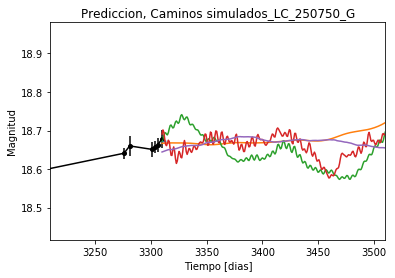

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_250750_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


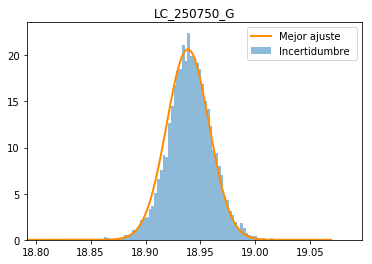

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_250750_G')
plt.savefig("Mejor_ajuste_LC_250750_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_250750_G')

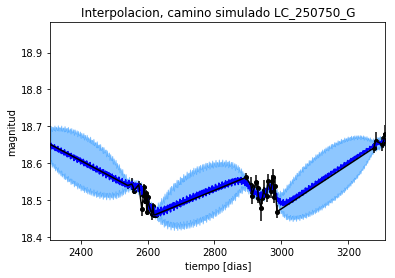

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_250750_G')

Text(0.5,1,'Interpolacion, camino simulado LC_250750_G')

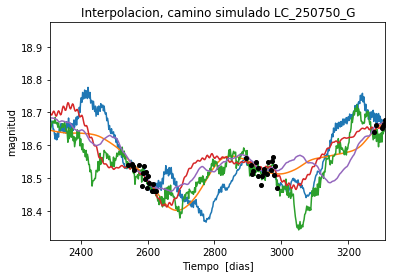

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_250750_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 467.826980207
Median: 0.0050381443194
Standard deviation: 0.10073966375
68% credibility interval: [ 0.00060592  0.09289137]
95% credibility interval: [  3.40371383e-04   3.97841309e-01]
99% credibility interval: [  3.08095308e-04   4.92691019e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 423.577108184
Median: 0.00144537144827
Standard deviation: 0.0354113136337
68% credibility interval: [ 0.0004695   0.01009082]
95% credibility interval: [ 0.00032607  0.10138058]
99% credibility interval: [ 0.0003057   0.25876869]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 627.355009964
Median: 0.00958650786529
Standard deviation:

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 194.287411871
Median: 123.276934583
Standard deviation: 2.86843724152
68% credibility interval: [ 121.44088501  127.07944853]
95% credibility interval: [ 118.92237834  130.32205852]
99% credibility interval: [ 116.71986153  131.27151476]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 806.744783459
Median: 0.22775747744
Standard deviation: 1.03041394867
68% credibility interval: [ 0.04847234  1.77402723]
95% credibility interval: [ 0.01599581  3.43318168]
99% credibility interval: [ 0.01045777  4.76755716]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 458.333471036
Median: 0.418288080817
Standard deviation: 1.85080191533
68% credibility interval: [ 0.01630746  1.62445714]
95% credibility interval: [  1.26195679e-03

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 16797.663086
Median: 7.1787824983e-18
Standard deviation: 2.04558802519e+148
68% credibility interval: [  2.53470897e-58   1.23310874e-02]
95% credibility interval: [  1.44064049e-71   2.21851040e+40]
99% credibility interval: [  2.16629792e-082   1.59381310e+106]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 133.604325243
Median: 18.6581335307
Standard deviation: 0.118406110106
68% credibility interval: [ 18.5885616   18.73548808]
95% credibility interval: [ 18.37747219  18.84925269]
99% credibility interval: [ 18.05773543  18.94344374]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 271.332763661
Median: 0.0263598208676
Standard deviation: 0.115892705335
68% credibility interval: [ 0.          0.19894679]
95% credibility interval: [ 0.          0.40875461]
99% credibility interval: [ 0.          0.49914874]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 271.332763661
Median: 0.0263598208676
Standard deviation: 0.115892705335
68% credibility interval: [ 0.          0.19894679]
95% credibility interval: [ 0.          0.40875461]
99% credibility interval: [ 0.          0.49914874]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 318.530435739
Median: 0.0
Standard deviation: 0.000416114635688
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 194.287411871
Median: 123.276934583
Standard deviation: 2.86843724152
68% credibility interval: [ 121.44088501  127.07944853]
95% credibility interval: [ 118.92237834  130.32205852]
99% credibility interval: [ 116.71986153  131.27151476]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 345.175822603
Median: 0.0280587237642
Standard deviation: 0.0466057593192
68% credibility interval: [ 0.01638359  0.0557563 ]
95% credibility interval: [ 0.01080668  0.20642753]
99% credibility interval: [ 0.00874257  0.28679004]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 267.42227393
Median: 1.3840445266
Standard deviation: 0.27466194849
68% credibility interval: [ 1.07937987  1.6570775 ]
95% credibility interval: [ 0.81730948  1.88445374]
99% credibility interval: [ 0.71101721  1.96928334]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 541.781613896
Median: 0.000106979382692
Standard deviation: 0.00940052038028
68% credibility interval: [  2.25065239e-06   1.65248603e-03]
95% credibility interval: [  4.08106121e-45   6.11220122e-03]
99% credibility interval: [  9.52000789e-111   3.53804812e-002]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 467.826980207
Median: (-0.0316555943631-1.14906444081j)
Standard deviation: 0.964823950962
68% credibility interval: [-0.58365372-2.07672829j -0.00380710-1.22430281j]
95% credibility interval: [ -2.49971067e+00+0.j          -2.13861647e-03-1.13910713j]
99% credibility interval: [ -3.09566897e+00+0.j          -1.93581991e-03-1.20913288j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 423.577108184
Median: (-0.00908153664721+0j)
Standard deviation: 0.761409043791
68% credibility interval: [-0.06340251+0.08116948j -0.00294998+0.j        ]
95% credibility interval: [-0.63699294+0.40097974j -0.00204874+0.031547j  ]
99% credibility interval: [-1.62589162+0.00552759j -0.00192079+1.2943805j ]
Posterior summary for parameter a